In [3]:
# import Pkg
# Pkg.add("DifferentialEquations")

In [4]:
# Pkg.add("Plots")

#ターミナル削除して整理する
#ブロックを作成
#似たようなブロックがあるので利用しながら
#quote
#gotoブロックに関してはscopeを引っ付けるだけで作成しても良い(ブロックを作成せずに)
#derivateiveブロック以外は作成したい
#いらないファイルやディレクトリは削除(コマンドで削除するのが良い)
#左のタブの上から二番目のところで定期的にカーネルを削除する
#ブロックシートのc列のところを拡大すると必要ブロックが全て書いてある

In [1]:
include("../src/JuliaMBDv1.jl")

Main.JuliaMBDv1

In [2]:
using DifferentialEquations
using Plots
using .JuliaMBDv1　###書き換える### example1.ipynbのように

In [3]:
#comp #######出来てる
@model Eng_mnt_f_pnt begin
    
    @parameter d_Fr_ENG_mount #Gainブロック
    @parameter k_Fr_ENG_mount #Gain1ブロック
    @parameter z_k_Fr_ENG_mount_ini #Constantブロック
    
    #@blk Constant92 = ConstantBlock(b) ###outport:beta #エンジンからの上下速度
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 ###
    #@blk Constant = ConstantBlock(z_k_Fr_ENG_mount_ini) #()の中で定数を指定
    #@blk Integrator1 = IntegratorBlock() inport[1]:add inport[2]:cons
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_ENG_mount_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_ENG_mount)
    @blk Gain1 = GainBlock(k_Fr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_f_pnt (generic function with 1 method)

In [5]:
###出来てる
@model TestEng_mnt_f_pnt begin
    @parameter d_Fr_ENG_mount k_Fr_ENG_mount z_k_Fr_ENG_mount_ini
    ##@blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:in1
    
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Step2 = RampBlock(starttime = 10, slope = 25) outport:inin2
    @blk mnt_f_pnt = Eng_mnt_f_pnt(d_Fr_ENG_mount=d_Fr_ENG_mount, k_Fr_ENG_mount=k_Fr_ENG_mount, z_k_Fr_ENG_mount_ini=z_k_Fr_ENG_mount_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    @connect inin1 => r
    @connect inin2 => y
    
#    @blk Step2 = StepBlock(steptime = 1, finalvalue = 120) outport:in2
    ##@blk Step2 = RampBlock(starttime = 10, slope = 5) outport:in2

    
    ##@blk mnt_f_pnt = Eng_mnt_f_pnt(d_Fr_ENG_mount=d_Fr_ENG_mount, k_Fr_ENG_mount=k_Fr_ENG_mount, z_k_Fr_ENG_mount_ini=z_k_Fr_ENG_mount_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    ##@connect in1 => r
    ##@connect in2 => y

end

TestEng_mnt_f_pnt (generic function with 1 method)

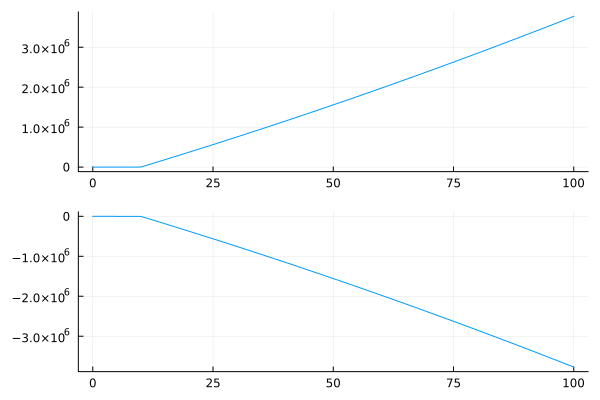

In [6]:
###出来てる
m = TestEng_mnt_f_pnt(d_Fr_ENG_mount=1825.3, k_Fr_ENG_mount=6, z_k_Fr_ENG_mount_ini=0.00036769);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph

In [7]:
#######出来てる
#@blk ConstantブロックはIntegratorBlock()の入力ポートが一つになるように削除した
@model Eng_mnt_f_pnt begin
    
    @parameter d_Fr_ENG_mount #Gainブロック
    @parameter k_Fr_ENG_mount #Gain1ブロック
    @parameter z_k_Fr_ENG_mount_ini #Constantブロック
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 ###
    #@blk Constant = ConstantBlock(z_k_Fr_ENG_mount_ini) #()の中で定数を指定
    #@blk Integrator1 = IntegratorBlock() inport[1]:add inport[2]:cons
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_ENG_mount_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_ENG_mount)
    @blk Gain1 = GainBlock(k_Fr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_f_pnt (generic function with 1 method)

In [32]:
#comp #######出来てる
#直接演算テスト
@model Eng_mnt_f_pnt begin
    
    @parameter d_Fr_ENG_mount #Gainブロック
    @parameter k_Fr_ENG_mount #Gain1ブロック
    @parameter z_k_Fr_ENG_mount_ini #Constantブロック
    
    
    
    ###outportについての指定をする
    #@blk Constant91 = ConstantBlock(a) ###outport:alpha #エンジンからの上下速度
    #@blk Constant92 = ConstantBlock(b) ###outport:beta #エンジンからの上下速度
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    #@blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 ###
    #@blk Constant = ConstantBlock(z_k_Fr_ENG_mount_ini) #()の中で定数を指定
    #@blk Integrator1 = IntegratorBlock() inport[1]:add inport[2]:cons
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_ENG_mount_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_ENG_mount)
    @blk Gain1 = GainBlock(k_Fr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
   
    #@connect In1 => in1
    #@connect In2 => in2
    
    @connect In2 * In1 => Gain #ブロックではなくS左で演算を作成している
    @connect In2 / In1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_f_pnt (generic function with 1 method)

In [35]:
# * /のconstantで値を代入してどんな値が出るかを見る
# * /の演算はブロックではなく直接、左のポート
#excelシートでモデル全てを書いて、動いたモデルは●動かないモデルは理由を（ブロックがないなど）
# """ """のコメントアウトは文字列になるのでだめ
#ないブロックの仕様との比較

In [ ]:
#ここから

In [ ]:
#2_ENG_.....のファイルの実行、model定義でエラーが出るため、sim.jlもインポートできない

In [8]:
#initialcondition = 6と勝手に指定,outのポートを増やした,掛け算割り算は直接演算
@model pitch_rate begin
    @parameter I_ENG2Fr_mount I_ENG2Rr_mount i_center_ENG
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant4 = ConstantBlock(I_ENG2Fr_mount)
    @blk Constant1 = ConstantBlock(I_ENG2Rr_mount)
    @blk Add1 = AddBlock([:+, :+]) inport[1]:cons1 inport[2]:cons2
    @blk Constant6 = ConstantBlock(i_center_ENG)
    @blk Integrator = IntegratorBlock(initialcondition = 6)
    #@blk Out = OutBlock()
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1*Constant4 => cons1
    @connect In2*Constant1 => cons2
    @connect Add1/Constant6=>Integrator
    #@connect Integrator=>Out
    @connect Integrator=>Out1
    @connect Integrator=>Out2
end

pitch_rate (generic function with 1 method)

In [9]:
@model TestPitch_rate begin
    
    @parameter I_ENG2Fr_mount I_ENG2Rr_mount i_center_ENG
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    #@blk pitch = pitch_rate(I_ENG2Fr_mount=I_ENG2Fr_mount, I_ENG2Rr_mount=I_ENG2Rr_mount, i_center_ENG=i_center_ENG) inport[1]:r inport[2]:y outport:omega
    @blk pitch = pitch_rate(I_ENG2Fr_mount=I_ENG2Fr_mount, I_ENG2Rr_mount=I_ENG2Rr_mount, i_center_ENG=i_center_ENG) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta  
    @connect inin1 => r
    @connect inin2 => y

end

TestPitch_rate (generic function with 1 method)

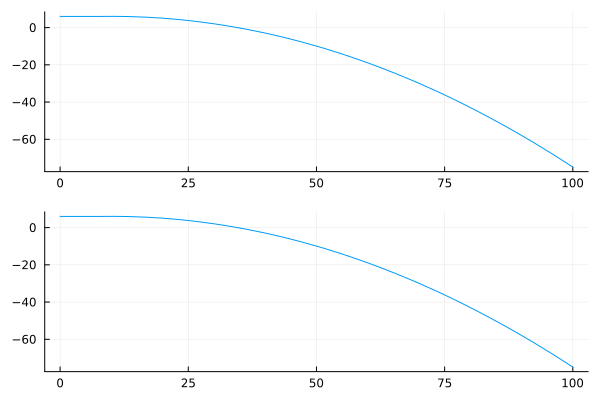

In [10]:
m = TestPitch_rate(I_ENG2Fr_mount=0, I_ENG2Rr_mount=-0.4, i_center_ENG=100);
#sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega));
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega,beta));
sol.graph


#scopeが1変数の時できていない

In [11]:
#initialcondition = 6と勝手に指定,outのポートを増やした,掛け算割り算は直接演算
@model v_z_carbody begin
    @parameter g M_ENG
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_ENG)
    @blk Add = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:abc
    @blk Integrator1 = IntegratorBlock(initialcondition = 6)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1*Constant => abc
    @connect Add / Constant => Integrator1
    @connect Integrator1 => Out1
    @connect Integrator1 => Out2
end

v_z_carbody (generic function with 1 method)

In [182]:
@model TestV_z_carbody begin
    
    @parameter g M_ENG
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    @blk carbody = v_z_carbody(g=g, M_ENG=M_ENG) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta  
    @connect inin1 => r
    @connect inin2 => y

end

TestV_z_carbody (generic function with 1 method)

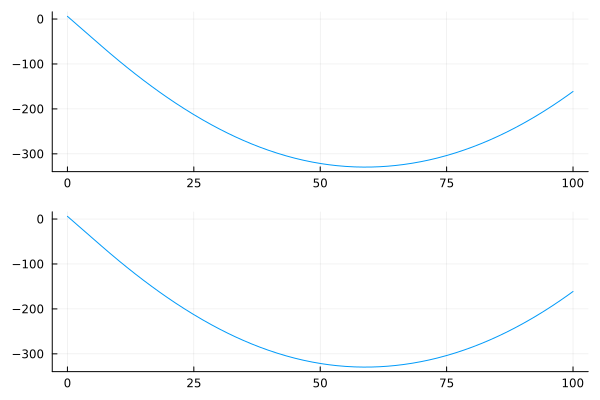

In [183]:
m = TestV_z_carbody(g=9.8, M_ENG=50);
#sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega));
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega,beta));
sol.graph


#scopeが1変数の時できていない

In [12]:
#掛け算は直接演算
@model z_velocity begin
    @parameter g M_ENG
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_ENG)
    @blk Add = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:abc
    @blk Integrator1 = IntegratorBlock(initialcondition = 6)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1*Constant => abc
    @connect Add / Constant => Integrator1
    @connect Integrator1 => Out1
    @connect Integrator1 => Out2
end

z_velocity (generic function with 1 method)

In [ ]:
#v_z_ENG,ENG_pitch_rateの扱いが不明

In [ ]:
#MUS_F_PNT

In [ ]:
#M_Fr_wheelは初期値が指定されていなかったので自分で勝手に定めた
#initialcondition = 6と勝手に指定,掛け算割り算は直接演算
@model mus_f_pnt begin
    @parameter g M_Fr_wheel
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_Fr_wheel)
    @blk Add2 = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:pro
    @blk Integrator = IntegratorBlock(initialcondition = 6)
    
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1 * Constant => pro
    @connect Add2 / Constant => Integrator
    @connect Integrator => Out1
    @connect Integrator => Out2
end

In [ ]:
@model TestMus_f_pnt begin
    
    @parameter g M_Fr_wheel
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    @blk pitch = myself(g=g, M_Fr_wheel=M_Fr_wheel) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    @connect inin1 => r
    @connect inin2 => y

end

In [ ]:
m = TestMus_f_pnt(g=9.8 M_Fr_wheel = 6);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph

In [ ]:
#色々テスト

In [ ]:
###出来ている

In [113]:
@model myself begin
    @parameter abc de
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:in2
    @blk Add2 = AddBlock([:+, :-]) inport[1]:in3 inport[2]:in4 #同じInブロックからの線でもinportの名前は変えないといけない
    @blk Gain1 = GainBlock(abc)
    @blk Gain2 = GainBlock(de)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect In1 => in3
    @connect In2 => in4
    
    @connect Add1 => Gain1
    @connect Add2 => Gain2
    #@connect In1+In2 => Gain1
    #@connect Add => Out1
    #@connect In1-In2 => Gain2
    @connect Gain1 => Out1
    @connect Gain2 => Out2
end

myself (generic function with 1 method)

In [143]:
@model myself begin
    @parameter abc de
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Gain1 = GainBlock(abc)
    @blk Gain2 = GainBlock(de)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    

    @connect In1*In2 => Gain1
    @connect In1/In2 => Gain2
    @connect Gain1 => Out1
    @connect Gain2 => Out2
end

myself (generic function with 1 method)

In [144]:
@model TestMyself begin
    
    @parameter abc de
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    @blk pitch = myself(abc=abc, de=de) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
#blkの右辺をmyselfに変更    
    @connect inin1 => r
    @connect inin2 => y

end

TestMyself (generic function with 1 method)

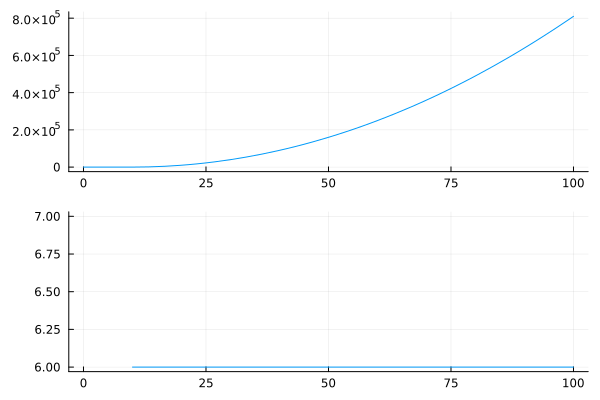

In [145]:
m = TestMyself(abc = 4, de = 6);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph

In [ ]:
#出来ている

In [119]:
#initialcondition = 0.00036769テスト
@model Eng_mnt_f_pnt begin
    
    @parameter d_Fr_ENG_mount #Gainブロック
    @parameter k_Fr_ENG_mount #Gain1ブロック
    @parameter z_k_Fr_ENG_mount_ini #Constantブロック
    
    
    
    ###outportについての指定をする
    #@blk Constant91 = ConstantBlock(a) ###outport:alpha #エンジンからの上下速度
    #@blk Constant92 = ConstantBlock(b) ###outport:beta #エンジンからの上下速度
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 ###
    #@blk Constant = ConstantBlock(z_k_Fr_ENG_mount_ini) #()の中で定数を指定
    #@blk Integrator1 = IntegratorBlock() inport[1]:add inport[2]:cons
    @blk Integrator1 = IntegratorBlock(initialcondition = 0.00036769) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_ENG_mount)
    @blk Gain1 = GainBlock(k_Fr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_f_pnt (generic function with 1 method)

In [120]:
@model TestEng_mnt_f_pnt begin
    @parameter d_Fr_ENG_mount k_Fr_ENG_mount
    ##@blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:in1
    
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Step2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    @blk mnt_f_pnt = Eng_mnt_f_pnt(d_Fr_ENG_mount=d_Fr_ENG_mount, k_Fr_ENG_mount=k_Fr_ENG_mount) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    @connect inin1 => r
    @connect inin2 => y
    
#    @blk Step2 = StepBlock(steptime = 1, finalvalue = 120) outport:in2
    ##@blk Step2 = RampBlock(starttime = 10, slope = 5) outport:in2

    
    ##@blk mnt_f_pnt = Eng_mnt_f_pnt(d_Fr_ENG_mount=d_Fr_ENG_mount, k_Fr_ENG_mount=k_Fr_ENG_mount, z_k_Fr_ENG_mount_ini=z_k_Fr_ENG_mount_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    ##@connect in1 => r
    ##@connect in2 => y

end

TestEng_mnt_f_pnt (generic function with 1 method)

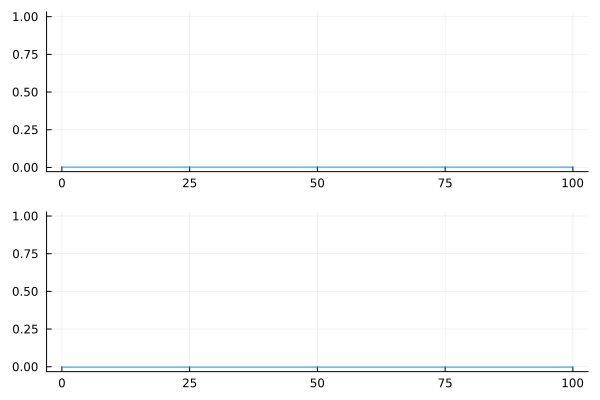

In [121]:
m = TestEng_mnt_f_pnt(d_Fr_ENG_mount=1825.3, k_Fr_ENG_mount=6);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph

In [ ]:
#scopeを1変数のテスト

In [158]:
@model myself begin
    @parameter abc de
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Gain1 = GainBlock(abc)
    @blk Gain2 = GainBlock(de)
    @blk Out1 = OutBlock()
    
    @blk Out2 = OutBlock()
    
    

    @connect In1*In2 => Gain1
    @connect In1/In2 => Gain2
    @connect Gain1 => Out1
    
    @connect Gain2 => Out2
end

myself (generic function with 1 method)

In [159]:
@model TestMyself begin
    
    @parameter abc de
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 5) outport:inin2
    #@blk pitch = myself(abc=abc, de=de) inport[1]:r inport[2]:y outport:omega
    @blk pitch = myself(abc=abc, de=de) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
#blkの右辺をmyselfに変更    
    @connect inin1 => r
    @connect inin2 => y

end

TestMyself (generic function with 1 method)

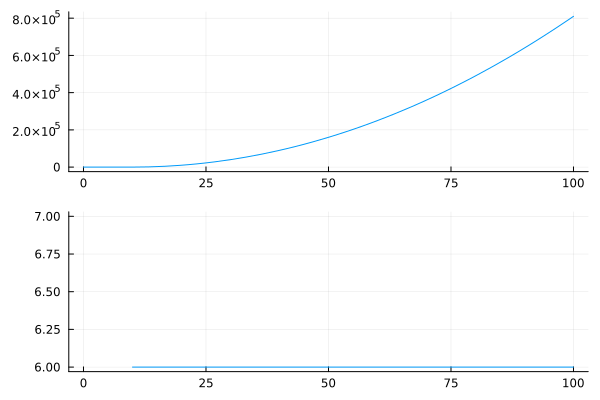

In [162]:
m = TestMyself(abc = 4, de = 6);
#sol = @simulate(m, tspan=(0.0, 100.0), scope=omega);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega,beta));
sol.graph